# Classification Problem Statement In Python Using Pandas and Numpy

----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of , Electrical vehicle population data : https://www.kaggle.com/datasets/gunapro/electric-vehicle-population-data/data /) openly available on : https://github.com/krishddd/Assignment_AIEnsured.git

#### All Vehicle population data

# US  Electric Vehicle Population Data

In [1]:
# IMPORT HERE!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
%matplotlib inline

# Imported the data from Kaggele Electic Vehicle Population Data

In [3]:
vehicle = pd.read_csv('Electric_Vehicle_Population_Data.csv')
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

# By Understanding Sample data for Preprocessing

In [4]:
vehicle.sample(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
122011,5YJ3E1EA2P,Pierce,Tacoma,WA,98422.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,228810781,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
73324,5YJYGDEF9M,King,Kirkland,WA,98033.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,179769159,POINT (-122.20264 47.6785),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
84197,7SAYGDEE4N,Walla Walla,Walla Walla,WA,99362.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,16.0,220150444,POINT (-118.34332 46.063985),PACIFICORP,5.307192e+10
149969,7SAYGDEEXP,Pierce,Bonney Lake,WA,98391.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,237800286,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
147069,JTJHKCFZ1R,Lewis,Glenoma,WA,98336.0,2024,LEXUS,NX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,20.0,252368847,POINT (-122.1228547 46.5337193),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10
50128,1N4BZ0CP0H,Clark,Vancouver,WA,98682.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,17.0,156522642,POINT (-122.5146473 45.67862),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
57016,5YJ3E1EA7M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,197460658,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
53048,KM8KM4AE0N,King,Seattle,WA,98118.0,2022,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,37.0,195025855,POINT (-122.28339 47.549285),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
138815,2C4RC1N70J,Snohomish,Everett,WA,98203.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,38.0,475249631,POINT (-122.213105 47.95479),PUGET SOUND ENERGY INC,5.306104e+10
149736,7FCTGAAA0P,Snohomish,Snohomish,WA,98290.0,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,44.0,236205112,POINT (-122.091505 47.915555),PUGET SOUND ENERGY INC,5.306105e+10


# Data Cleaning 

# Finding the total value count for each column.

In [5]:
Total_vin = vehicle['VIN (1-10)'].value_counts()
Total_vin

VIN (1-10)
7SAYGDEE7P    807
7SAYGDEE6P    802
7SAYGDEE8P    775
7SAYGDEE2P    775
7SAYGDEEXP    772
             ... 
5YJSA1AG4D      1
WAUEJBFW3P      1
YV4BR0DK8L      1
WMZ23BS05N      1
JN1CF0BB5P      1
Name: count, Length: 9529, dtype: int64

In [6]:
Total_country = vehicle['County'].value_counts().head(10)
Total_country

County
King         79075
Snohomish    17307
Pierce       11542
Clark         8855
Thurston      5403
Kitsap        4923
Spokane       3690
Whatcom       3668
Benton        1801
Skagit        1658
Name: count, dtype: int64

In [7]:
Top_10_city = vehicle['City'].value_counts().head(10)
Top_10_city

City
Seattle      25675
Bellevue      7691
Redmond       5502
Vancouver     5310
Bothell       4861
Kirkland      4622
Sammamish     4436
Renton        4043
Olympia       3634
Tacoma        3121
Name: count, dtype: int64

In [8]:
total_postal = vehicle['Postal Code'].value_counts()
total_postal

Postal Code
98052.0    3869
98012.0    2753
98033.0    2619
98006.0    2457
98004.0    2456
           ... 
92101.0       1
28545.0       1
20653.0       1
94707.0       1
21042.0       1
Name: count, Length: 823, dtype: int64

In [9]:
total_year = vehicle['Model Year'].value_counts()
total_year

Model Year
2023    37079
2022    27799
2021    18684
2018    14441
2020    11294
2019    10717
2017     8574
2016     5650
2015     4934
2013     4566
2014     3613
2012     1633
2011      796
2024      642
2010       24
2008       19
2000        8
1999        4
2002        2
1998        1
2003        1
1997        1
Name: count, dtype: int64

In [10]:
total_make = vehicle['Make'].value_counts()
total_make

Make
TESLA                   68983
NISSAN                  13497
CHEVROLET               12026
FORD                     7614
BMW                      6439
KIA                      6198
TOYOTA                   5223
VOLKSWAGEN               4074
VOLVO                    3536
JEEP                     3292
HYUNDAI                  3171
AUDI                     3006
CHRYSLER                 2642
RIVIAN                   2483
MERCEDES-BENZ            1054
PORSCHE                  1028
MITSUBISHI                849
HONDA                     810
FIAT                      806
MINI                      791
POLESTAR                  764
SUBARU                    623
SMART                     274
LINCOLN                   229
JAGUAR                    228
LUCID                     190
CADILLAC                  176
LEXUS                     138
MAZDA                     136
GENESIS                   107
LAND ROVER                 47
FISKER                     17
ALFA ROMEO                 12
AZURE

In [11]:
total_model = vehicle['Model'].value_counts()
total_model

Model
MODEL Y        28502
MODEL 3        27709
LEAF           13187
MODEL S         7611
BOLT EV         5733
               ...  
745LE              2
918                1
FLYING SPUR        1
S-10 PICKUP        1
BENTAYGA           1
Name: count, Length: 127, dtype: int64

# to find out individual models we can write the code in statements

In [12]:
tesla_models = vehicle[vehicle['Make'] == 'NISSAN']['Model'].unique()

number_of_tesla_models = len(tesla_models)

print(f"Number of different Nissan models: {number_of_tesla_models}")
print("Nissan Models:")
print("\n".join(tesla_models))

Number of different Nissan models: 2
Nissan Models:
LEAF
ARIYA


In [13]:
total_vechicle_type = vehicle['Electric Vehicle Type'].value_counts()
total_vechicle_type

Electric Vehicle Type
Battery Electric Vehicle (BEV)            116807
Plug-in Hybrid Electric Vehicle (PHEV)     33675
Name: count, dtype: int64

In [14]:
total_fuel = vehicle['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
total_fuel

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    69698
Clean Alternative Fuel Vehicle Eligible                         62951
Not eligible due to low battery range                           17833
Name: count, dtype: int64

In [15]:
total_msrp = vehicle['Base MSRP'].value_counts()
total_msrp

Base MSRP
0         147027
69900       1441
31950        399
52900        218
32250        152
59900        134
54950        133
39995        117
36900        101
44100         97
45600         84
64950         83
33950         74
52650         68
34995         64
36800         53
55700         50
53400         34
110950        21
90700         19
98950         19
81100         19
102000        17
75095         15
184400        11
43700         10
109000         7
89100          6
91250          5
32995          3
845000         1
Name: count, dtype: int64

In [16]:
total_location = vehicle['Vehicle Location'].value_counts()
total_location

Vehicle Location
POINT (-122.12302 47.67668)       3869
POINT (-122.1876761 47.820517)    2753
POINT (-122.20264 47.6785)        2619
POINT (-122.16937 47.571015)      2457
POINT (-122.201905 47.61385)      2456
                                  ... 
POINT (-117.160635 32.717795)        1
POINT (-77.435 34.71242)             1
POINT (-76.4655642 38.2668073)       1
POINT (-122.27822 37.89127)          1
POINT (-76.83207 39.276485)          1
Name: count, Length: 822, dtype: int64

In [17]:
total_utility = vehicle['Electric Utility'].value_counts()
total_utility

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                      55634
PUGET SOUND ENERGY INC                                                             29865
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                       27268
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                    8643
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY     6622
                                                                                   ...  
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY                             1
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                               1
BONNEVILLE POWER ADMINISTRATION||NESPELEM VALLEY ELEC COOP, INC                        1
CITY OF SEATTLE - (WA)                                                                 1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF JEFFERSON COUNTY                          1
Name

# Checking the null values, missing values, unique values and replacing those values accordingly.

In [18]:
vehicle.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

# Found some null values in the columns '**County**', '**City**', '**Vehicle Location**', '**Electric Utility**', '**2020 Census Tract**'. Dropping those rows.

In [19]:
vehicle.dropna(subset=['County', 'City', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'], inplace=True)
vehicle

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10


# To verify the missing data is dropped 

In [20]:
vehicle.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 338
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

# The column '**Legislative District**' has null values, replacing those null values with a random value '**10**'.

In [21]:
vehicle['Legislative District'] = vehicle['Legislative District'].replace(np.nan,'10')
vehicle.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

#  '**VIN (1-10)**' values are unique values.

# '**Postal Code**' values 100% are exactly same as '**City**'.

# '**Vehicle Location**' values 100% are exactly same as '**County**'.

# '**Electric Utility**' values 100% are exactly same as '**State**'.

# '**2020 Census Tract**' values are unique values.

In [22]:
# By dropping these columns
vehicle1 = vehicle.drop(['VIN (1-10)', 'Postal Code', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'], axis=1)

In [23]:
vehicle1

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386
...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,WA,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075
150478,King,Seattle,WA,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414
150479,King,Seattle,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626
150480,Snohomish,Mountlake Terrace,WA,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950


# # Data Manipulation & Transfromation

# '**Base MSRP**' has some missing values like '**0**' so what I would like to do is to fill those values by the mean by the '**Base MSRP**'.

In [24]:
avg_list = list(total_msrp.index)

In [25]:
avg = sum(avg_list)/ len(avg_list)

In [26]:
vehicle1['Base MSRP'] = vehicle1['Base MSRP'].replace(0, 88875)
vehicle1

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,88875,43.0,249675142
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,1.0,233928502
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,14.0,229675939
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,88875,45.0,104714466
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,88875,22.0,185498386
...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,WA,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,88875,19.0,251204075
150478,King,Seattle,WA,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,88875,43.0,241344414
150479,King,Seattle,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,88875,43.0,180705626
150480,Snohomish,Mountlake Terrace,WA,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,88875,1.0,240473950


#  '**Electric Range**' has some missing values like '**0**' so what I would like to do is to fill those values by the mean by the '**Electric Range**'.

In [27]:
total_range = vehicle1['Electric Range'].value_counts()
total_range

Electric Range
0      69697
215     6490
220     4123
84      4023
238     3611
       ...  
74         4
95         3
11         2
57         1
59         1
Name: count, Length: 102, dtype: int64

In [28]:
vehicle1['Electric Range'] = vehicle1['Electric Range'].replace(0, 111)
vehicle1

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,88875,43.0,249675142
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,1.0,233928502
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,14.0,229675939
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,88875,45.0,104714466
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,88875,22.0,185498386
...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,WA,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,19.0,251204075
150478,King,Seattle,WA,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43.0,241344414
150479,King,Seattle,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43.0,180705626
150480,Snohomish,Mountlake Terrace,WA,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,88875,1.0,240473950


# '**State**' column has the shortfroms of the State names, Now I want to replace those with the complete state name.
#  Ex: WA - Washington

In [29]:
state_map = {'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'}

vehicle1['State'] = vehicle1['State'].replace(state_map)
vehicle1

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,King,Seattle,Washington,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,88875,43.0,249675142
1,King,Bothell,Washington,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,1.0,233928502
2,Yakima,Yakima,Washington,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,14.0,229675939
3,King,Kirkland,Washington,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,88875,45.0,104714466
4,Thurston,Olympia,Washington,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,88875,22.0,185498386
...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,Washington,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,19.0,251204075
150478,King,Seattle,Washington,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43.0,241344414
150479,King,Seattle,Washington,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43.0,180705626
150480,Snohomish,Mountlake Terrace,Washington,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,88875,1.0,240473950


# '**DOL Vehicle ID**' has the unique vales, So I want to give them the index.

In [30]:
vehicle1['DOL Vehicle ID'] = pd.factorize(vehicle1['DOL Vehicle ID'])[0] + 1
vehicle1

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,King,Seattle,Washington,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,88875,43.0,1
1,King,Bothell,Washington,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,1.0,2
2,Yakima,Yakima,Washington,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,14.0,3
3,King,Kirkland,Washington,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,88875,45.0,4
4,Thurston,Olympia,Washington,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,88875,22.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,Washington,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,19.0,150471
150478,King,Seattle,Washington,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43.0,150472
150479,King,Seattle,Washington,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43.0,150473
150480,Snohomish,Mountlake Terrace,Washington,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,88875,1.0,150474


#  '**Legislative District**' is a **float type**, So I convert them from float values to **int** values.

In [31]:
vehicle1['Legislative District'] = vehicle1['Legislative District'].astype(int)
vehicle1

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,King,Seattle,Washington,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,88875,43,1
1,King,Bothell,Washington,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,1,2
2,Yakima,Yakima,Washington,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,14,3
3,King,Kirkland,Washington,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,88875,45,4
4,Thurston,Olympia,Washington,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,88875,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,Washington,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,19,150471
150478,King,Seattle,Washington,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43,150472
150479,King,Seattle,Washington,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43,150473
150480,Snohomish,Mountlake Terrace,Washington,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,88875,1,150474


In [34]:
vehicle1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150475 entries, 0 to 150481
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   County                                             150475 non-null  object
 1   City                                               150475 non-null  object
 2   State                                              150475 non-null  object
 3   Model Year                                         150475 non-null  object
 4   Make                                               150475 non-null  object
 5   Model                                              150475 non-null  object
 6   Electric Vehicle Type                              150475 non-null  object
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  150475 non-null  object
 8   Electric Range                                     150475 non-null  int64 
 9   Base MSRP

# The column **Year** seems numeric but I wanna make it as **string** to make it easy to compare.

In [33]:
vehicle1['Model Year'] = vehicle1['Model Year'].astype(str)
vehicle1

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,King,Seattle,Washington,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,88875,43,1
1,King,Bothell,Washington,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,1,2
2,Yakima,Yakima,Washington,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,88875,14,3
3,King,Kirkland,Washington,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,88875,45,4
4,Thurston,Olympia,Washington,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,88875,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,Washington,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,19,150471
150478,King,Seattle,Washington,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43,150472
150479,King,Seattle,Washington,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,111,88875,43,150473
150480,Snohomish,Mountlake Terrace,Washington,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,88875,1,150474


# Data Questioning 

In [35]:
# what are the highest and lowest population count in dataset
state_counts = vehicle1['State'].value_counts()

highest_count_state = state_counts.idxmax()
highest_count = state_counts.max()

lowest_count_state = state_counts.idxmin()
lowest_count = state_counts.min()

print(f"The state with the highest count is: {highest_count_state} with a count of {highest_count}")
print(f"The state with the lowest count is: {lowest_count_state} with a count of {lowest_count}")

The state with the highest count is: Washington with a count of 150137
The state with the lowest count is: Montana with a count of 1


In [36]:
#2. Which county has the highest population of Electric Vehicles and in which year?

ev_df = vehicle1[vehicle1['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

county_year_counts = ev_df.groupby(['County', 'Model Year']).size().reset_index(name='Count')

max_count_row = county_year_counts.loc[county_year_counts['Count'].idxmax()]

max_count_county = max_count_row['County']
max_count_year = max_count_row['Model Year']
max_count = max_count_row['Count']

print(f"The county with the maximum count of Electric Vehicles is: {max_count_county}")
print(f"The corresponding year is: {max_count_year}")
print(f"The count of Electric Vehicles is: {max_count}")

The county with the maximum count of Electric Vehicles is: King
The corresponding year is: 2023
The count of Electric Vehicles is: 17633


In [37]:
#3. What is the average Electric Rang of all Makes in US

vehicle1['Electric Range'] = pd.to_numeric(vehicle1['Electric Range'], errors='coerce')

average_electric_range = vehicle1.groupby('Make')['Electric Range'].mean()

print(average_electric_range)

Make
ALFA ROMEO               33.000000
AUDI                     90.886560
AZURE DYNAMICS           56.000000
BENTLEY                  19.000000
BMW                      59.522131
CADILLAC                 72.056818
CHEVROLET               124.592516
CHRYSLER                 32.242998
FIAT                     85.626551
FISKER                   33.000000
FORD                     66.322564
GENESIS                 111.000000
HONDA                    46.627160
HYUNDAI                 108.860252
JAGUAR                  218.355263
JEEP                     22.331713
KIA                     100.129417
LAND ROVER               21.723404
LEXUS                    65.956522
LINCOLN                  23.628821
LUCID                   111.000000
MAZDA                    26.000000
MERCEDES-BENZ            84.011385
MINI                     84.676359
MITSUBISHI               29.784452
NISSAN                  105.237922
POLESTAR                130.002618
PORSCHE                  83.417315
RIVIAN         

In [38]:
#4. How many Models are there in each Make?

model_counts = vehicle1.groupby('Make')['Model'].nunique()

print(model_counts)

Make
ALFA ROMEO               1
AUDI                    11
AZURE DYNAMICS           1
BENTLEY                  2
BMW                     11
CADILLAC                 3
CHEVROLET                5
CHRYSLER                 1
FIAT                     1
FISKER                   1
FORD                     8
GENESIS                  3
HONDA                    2
HYUNDAI                  8
JAGUAR                   1
JEEP                     2
KIA                      7
LAND ROVER               2
LEXUS                    2
LINCOLN                  2
LUCID                    1
MAZDA                    1
MERCEDES-BENZ           10
MINI                     2
MITSUBISHI               2
NISSAN                   2
POLESTAR                 1
PORSCHE                  4
RIVIAN                   3
SMART                    3
SUBARU                   2
TESLA                    5
TH!NK                    1
TOYOTA                   6
VOLKSWAGEN               2
VOLVO                    7
WHEEGO ELECTRIC CARS   

In [39]:
#5. What is the average Base MSRP of each make?

average_base_msrp = vehicle1.groupby('Make')['Base MSRP'].mean()

print(average_base_msrp)

Make
ALFA ROMEO               88875.000000
AUDI                     88875.000000
AZURE DYNAMICS           88875.000000
BENTLEY                  88875.000000
BMW                      86045.003106
CADILLAC                 87700.568182
CHEVROLET                88875.000000
CHRYSLER                 86710.367146
FIAT                     88875.000000
FISKER                  102000.000000
FORD                     88875.000000
GENESIS                  88875.000000
HONDA                    88875.000000
HYUNDAI                  88875.000000
JAGUAR                   88875.000000
JEEP                     88875.000000
KIA                      83174.193158
LAND ROVER               88875.000000
LEXUS                    88875.000000
LINCOLN                  88875.000000
LUCID                    88875.000000
MAZDA                    88875.000000
MERCEDES-BENZ            88875.000000
MINI                     78749.273072
MITSUBISHI               88875.000000
NISSAN                   88875.000000
POLESTA

In [40]:
# Compare top 5 Legislative Districts.

top_5_districts = vehicle1['Legislative District'].value_counts().nlargest(5)
print(top_5_districts)

Legislative District
41    9969
45    9171
48    8419
1     6510
36    6494
Name: count, dtype: int64


# ** Data Visualisation **

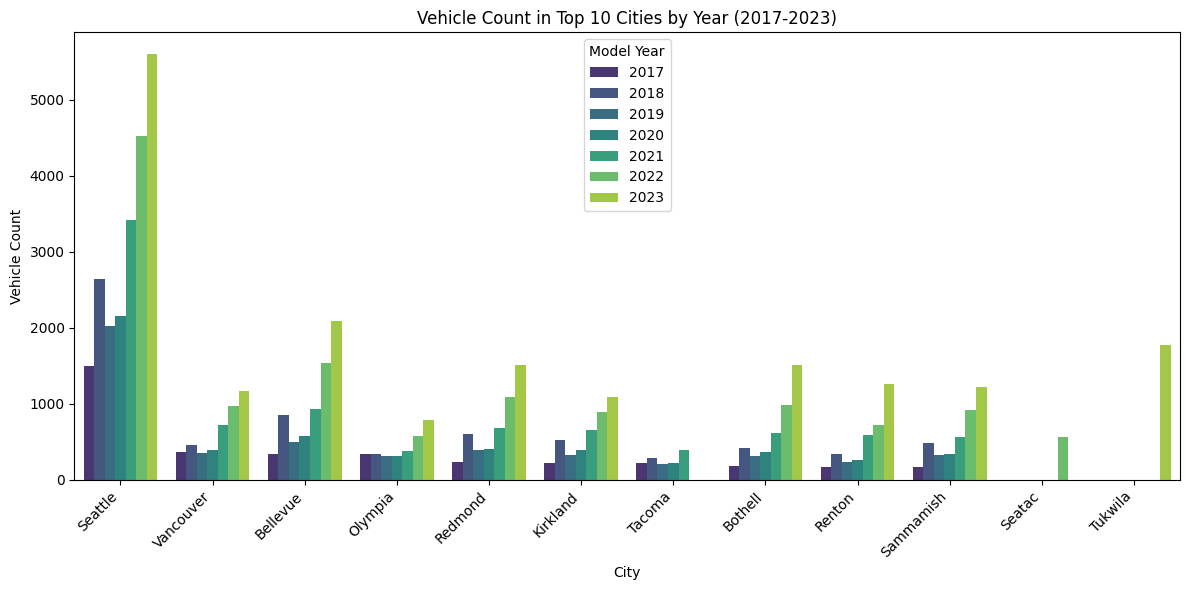

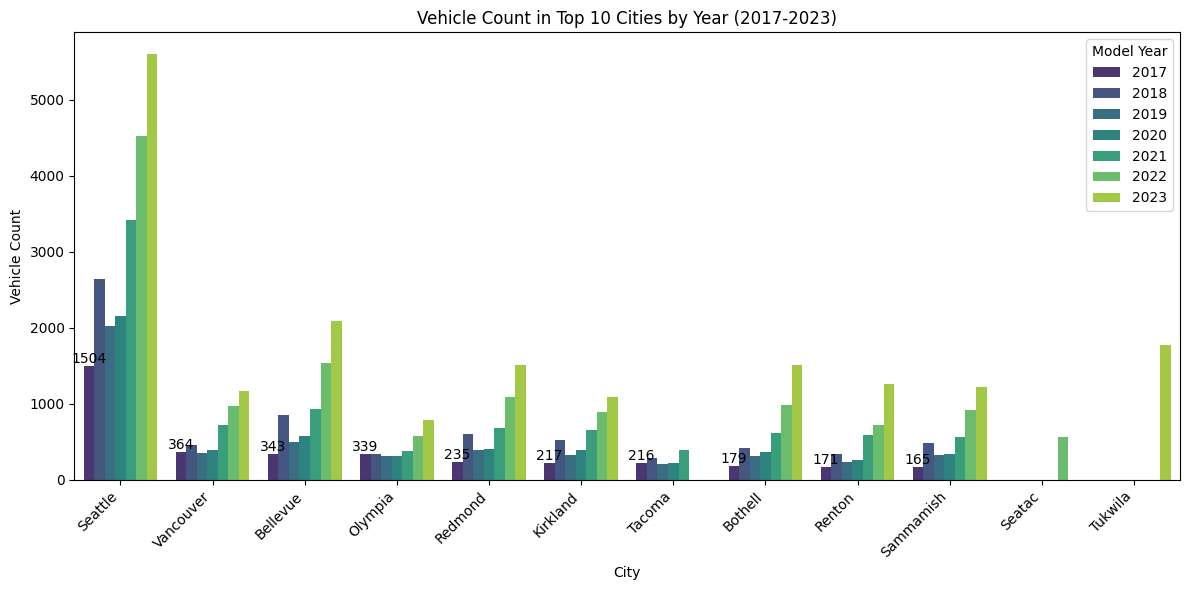

In [41]:
# Filter data for years 2017-2023
df_filtered = vehicle1[vehicle1['Model Year'].astype(int).between(2017, 2023)]

# Group by city and year, count vehicles
grouped_df = df_filtered.groupby(['City', 'Model Year']).size().reset_index(name='Vehicle Count')

# Top 10 cities by year
top_cities_by_year = grouped_df.groupby('Model Year').apply(lambda x: x.nlargest(10, 'Vehicle Count')).reset_index(drop=True)

# Matplotlib visualization
plt.figure(figsize=(12, 6))
sb.barplot(x='City', y='Vehicle Count', hue='Model Year', data=top_cities_by_year, palette='viridis')
plt.title('Vehicle Count in Top 10 Cities by Year (2017-2023)')
plt.xlabel('City')
plt.ylabel('Vehicle Count')
plt.legend(title='Model Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Seaborn visualization
fig, ax = plt.subplots(figsize=(12, 6))
sb.barplot(x='City', y='Vehicle Count', hue='Model Year', data=top_cities_by_year, palette='viridis', ax=ax)
ax.set(title='Vehicle Count in Top 10 Cities by Year (2017-2023)', xlabel='City', ylabel='Vehicle Count')
ax.legend(title='Model Year', loc='upper right')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

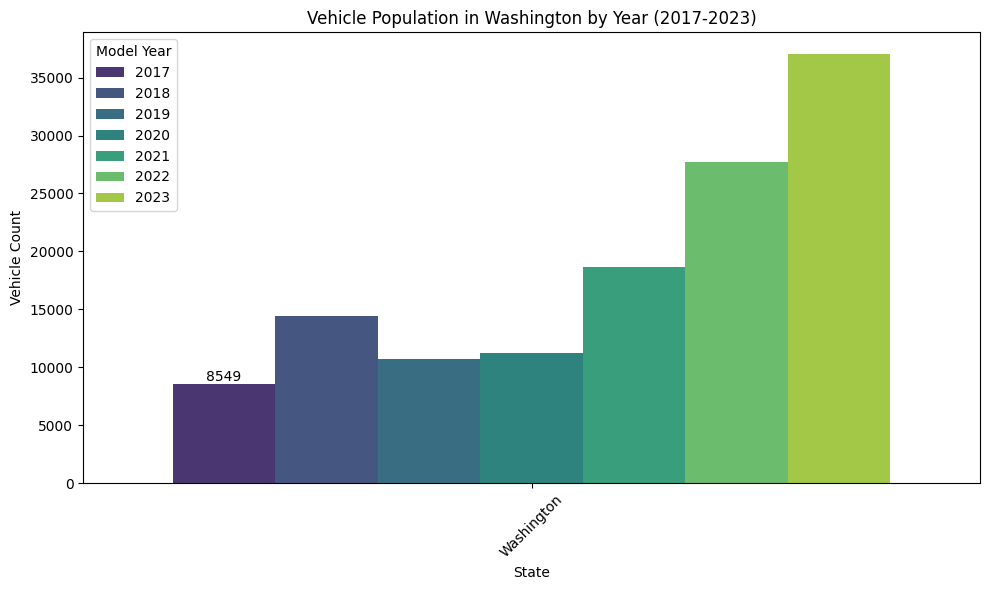

In [43]:
# Filter data by model year
df_filtered = vehicle1[vehicle1['Model Year'].astype(int).between(2017, 2023)]

# Group data by state and model year and count vehicles
grouped_df = df_filtered.groupby(['State', 'Model Year']).size().reset_index(name='Vehicle Count')

# Find the top state with the most vehicles for each year
top_state_by_year = grouped_df.groupby('Model Year').apply(lambda x: x.nlargest(1, 'Vehicle Count')).reset_index(drop=True)

# Create a bar plot with Matplotlib and Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sb.barplot(x='State', y='Vehicle Count', hue='Model Year', data=top_state_by_year, ax=ax, palette='viridis')

# Set chart title and labels
ax.set(title='Vehicle Population in Washington by Year (2017-2023)', xlabel='State', ylabel='Vehicle Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels inside the bars
ax.bar_label(ax.containers[0])

# Show the plot
plt.tight_layout()
plt.show()

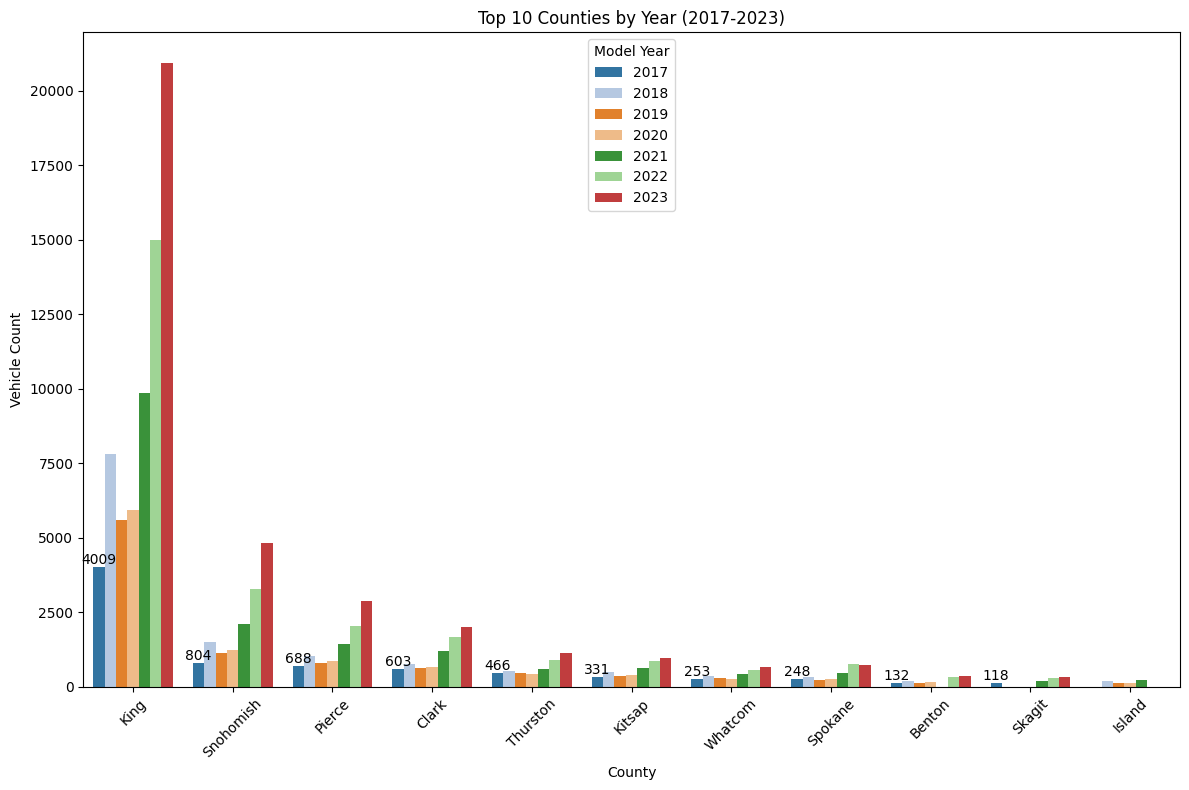

In [44]:
# Filter data by model year
df_filtered = vehicle1[vehicle1['Model Year'].astype(int).between(2017, 2023)]

# Group data by county and model year and count vehicles
grouped_df = df_filtered.groupby(['County', 'Model Year']).size().reset_index(name='Vehicle Count')

# Find the top 10 counties with the most vehicles for each year
top_county_by_year = grouped_df.groupby('Model Year').apply(lambda x: x.nlargest(10, 'Vehicle Count')).reset_index(drop=True)

# Create a bar plot with Matplotlib and Seaborn
fig, ax = plt.subplots(figsize=(12, 8))
sb.barplot(x='County', y='Vehicle Count', hue='Model Year', data=top_county_by_year, ax=ax, palette='tab20')

# Set chart title and labels
ax.set(title='Top 10 Counties by Year (2017-2023)', xlabel='County', ylabel='Vehicle Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels inside the bars
ax.bar_label(ax.containers[0])

# Show the plot
plt.tight_layout()
plt.show()

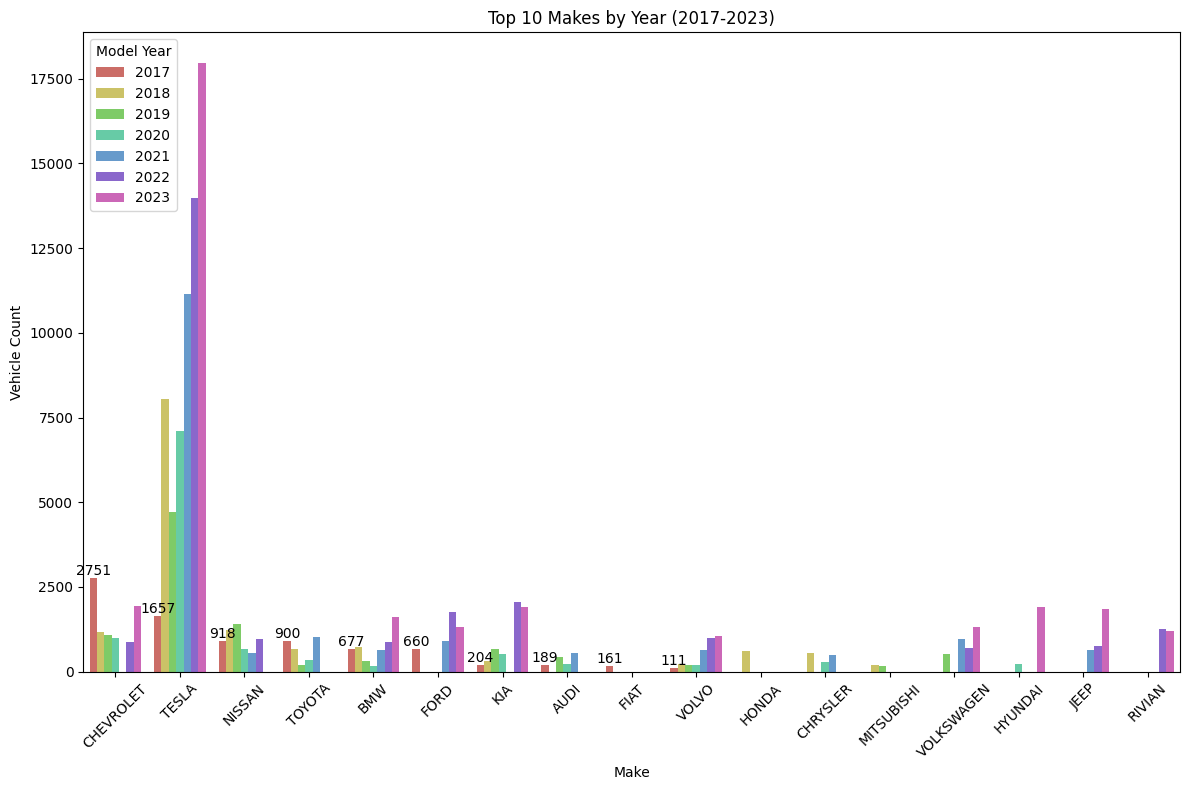

In [45]:
# Filter data by model year
df_filtered = vehicle1[vehicle1['Model Year'].astype(int).between(2017, 2023)]

# Group data by make and model year and count vehicles
grouped_df = df_filtered.groupby(['Make', 'Model Year']).size().reset_index(name='Vehicle Count')

# Find the top 10 makes with the most vehicles for each year
top_makes_by_year = grouped_df.groupby('Model Year').apply(lambda x: x.nlargest(10, 'Vehicle Count')).reset_index(drop=True)

# Create a bar plot with Matplotlib and Seaborn
fig, ax = plt.subplots(figsize=(12, 8))
sb.barplot(x='Make', y='Vehicle Count', hue='Model Year', data=top_makes_by_year, ax=ax, palette='hls')

# Set chart title and labels
ax.set(title='Top 10 Makes by Year (2017-2023)', xlabel='Make', ylabel='Vehicle Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels inside the bars
ax.bar_label(ax.containers[0])

# Show the plot
plt.tight_layout()
plt.show()

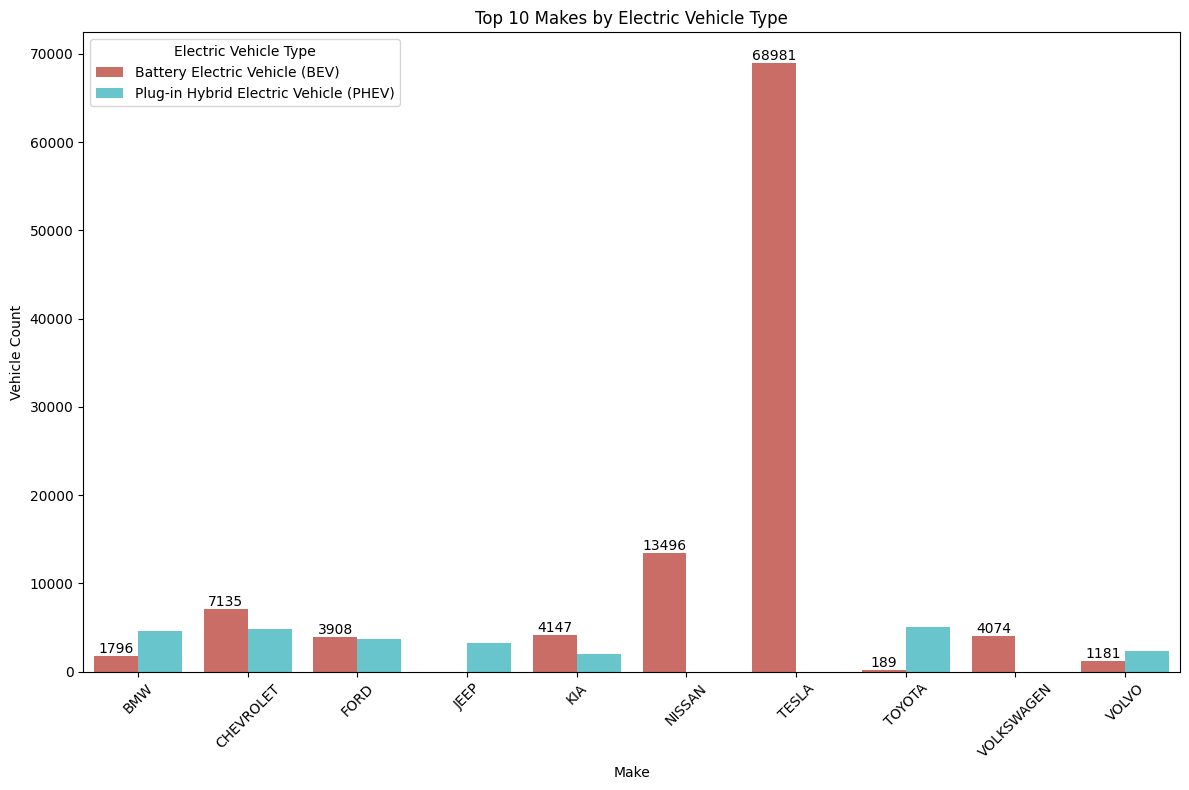

In [47]:
 # Count vehicles by make and electric vehicle type
count_data = vehicle1.groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='Vehicle Count')

# Get the top 10 makes by total vehicle count
top_10_makes = count_data.groupby('Make').sum().nlargest(10, 'Vehicle Count').index

# Filter data for top 10 makes
count_data_top_10 = count_data[count_data['Make'].isin(top_10_makes)]

# Create a bar plot with Seaborn and customize it
fig, ax = plt.subplots(figsize=(12, 8))
sb.barplot(x='Make', y='Vehicle Count', hue='Electric Vehicle Type', data=count_data_top_10, ax=ax, palette='hls')

# Set chart title and labels
ax.set(title="Top 10 Makes by Electric Vehicle Type", xlabel='Make', ylabel='Vehicle Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels inside the bars
ax.bar_label(ax.containers[0])

# Customize the legend
#ax.legend.set_title('Electric Vehicle Type')

# Show the plot
plt.tight_layout()
plt.show()

# Data Insights

# State - Washington (WA)
# Among the various states Washington has the highest Electric Vehicle population.
# 116583 is the population of Battery Electric Vehicle (BEV) in the state Washington.
# 33554 is the population of Plug in Hybrid Electric Vehicle (PHEV) in the state Washington.
# The highest Make in the state Washington is TESLA.
# The highest Model in the state Washington is MODEL Y.

# Top 2 Electric Vehicle Models in USY     
MODEL Y has 28.502k Electric Vehicle Population in US      .
The Electric Range of MODEL Y is 2      90
MODE      L 3
MODEL 3 has 27.709k Electric Vehicle Population in        US.
The Electric Range of MODEL 3 is 322

# Electric Range      
MODEL S has the highest Electric Range 340      
The count of MODEL S in US is only 761      1
The Average Electric Range of top 10 Models is 271.10  

# ** TESLA: The top Make in US    
TESLA has 5 different Models.      
MODEL       3
MODEL       Y
MODE      L S
MOD      EL X
ROA      DSTER 
TESLA manufacture only Battery Electric Vehicle (BEV), the count of BEV is 6      8.981k
The Electric Range of all Models in Make TESLAare a0 ove 250

In [10]:
#vehicle.info()

In [5]:
#vehicle['Model Year'] = pd.to_datetime(vehicle['Model Year'], format='%Y')

In [11]:
#vehicle.columns

# Identify the null points and Duplicate Values

In [12]:
#vehicle.isnull().sum()

In [13]:
#vehicle.duplicated().sum()

In [14]:
#vehicle.head()

In [15]:
#vehicle.describe().T

# Plot Histogram For Model Year Column

In [16]:
#plt.figure(figsize=(12,8),dpi =200)
#sb.histplot(data=vehicle, x='Model Year', bins=10)
#plt.title('Distribution of Model Year')
#plt.show()

# Plot Histogram For Country

In [17]:
#plt.figure(figsize=(12,8),dpi=200)
#sb.histplot(vehicle['County'][0:100000])
#plt.xticks(rotation ="vertical")
#plt.show()

# Plot a bar chart of vehicle counts by Electric Vehicle Type

In [18]:
#plt.figure(figsize=(8, 6))
#sb.countplot(data=vehicle, x='Electric Vehicle Type')
#plt.title('Vehicle Count by Electric Vehicle Type')
#plt.show()

# Plot a bar chart of vehicle counts by Make

In [19]:
#plt.figure(figsize=(12, 6))
#sb.countplot(data=vehicle, x='Make', order=vehicle['Make'].value_counts().index)
#plt.title('Vehicle Count by Make')
#plt.xticks(rotation=90)
#plt.show()

# Create a box plot of Model Year by County

In [20]:
#plt.figure(figsize=(12, 8),dpi=200)
#sb.boxplot(data=vehicle, x='County', y='Model Year')
#plt.title('Model Year Distribution by County')
#plt.xticks(rotation=90)
#plt.show()

In [21]:
#plt.figure(figsize=(15 , 10 ))
#sb.histplot(vehicle['City'][0:1000])
#plt.xticks(rotation ="vertical")
#plt.show()

# Filter relevant columns for analysis

In [23]:
#vehicle_market= vehicle[['Make', 'Electric Vehicle Type', 'Model']]
# Calculate the count of vehicles by Make and Electric Vehicle Type
#market_share = vehicle_market.groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='Count')

In [22]:
# Calculate the total count of vehicles by Make
#total_vehicles = market_share.groupby('Make')['Count'].sum().reset_index(name='Total')

# Calculate the market share percentage for each Electric Vehicle Type
#market_share = market_share.merge(total_vehicles, on='Make')
#market_share['Market Share (%)'] = (market_share['Count'] / market_share['Total']) * 100

In [24]:
# Plot the market share of Electric Vehicle Types by Make
#plt.figure(figsize=(12,8),dpi=200)
#sb.barplot(data=market_share, x='Make', y='Market Share (%)', hue='Electric Vehicle Type')
#plt.title('Market Share of Electric Vehicle Types by Make')
#plt.xlabel('Make')
#plt.ylabel('Market Share (%)')
#plt.xticks(rotation=90)
#plt.legend(title='Electric Vehicle Type')
#plt.show()

In [25]:
# Analyze CAFV Eligibility
#caf_eligibility_counts = vehicle['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Plot the CAFV Eligibility distribution
#plt.figure(figsize=(8, 6))
#sb.countplot(data=vehicle, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
#plt.title('CAFV Eligibility Distribution')
#plt.xlabel('CAFV Eligibility')
#plt.ylabel('Count')
#plt.xticks(rotation=90)
#plt.show()